<a href="https://colab.research.google.com/github/rikdantas/Aprendizagem-de-Maquinas/blob/main/ECT3695/Exercicio_2/Exercicio_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 2 - Análise e Visualização de Dados
Nesse notebook será desenvolvido o exercício 2 sobre análise e visualização de dados da disciplina de Aprendizado Profundo.

Aluno: Paulo Ricardo Dantas.

## Sobre o dataset
Este dataset contém dados detalhados sobre lutas do UFC desde 2013, incluindo características dos lutadores, como idade, altura, peso, técnicas usadas e o método de vitória. Cada linha do dataset representa uma luta, onde o lutador posicionado no corner azul (Blue) e o lutador no corner vermelho (Red) competem. As colunas que começam com “B_” referem-se ao lutador do corner azul, e as colunas que começam com “R_” referem-se ao lutador do corner vermelho. Sua tarefa é realizar uma análise completa do dataset, criando visualizações que ajudem a interpretar os dados e, por fim, definir um ranking dos lutadores.

## Importando o dataset

In [18]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Baixando o dataset
!wget https://heltonmaia.com/DL/_downloads/cd70a7fdb5672f07f8ca922133e6578d/ufc.csv

# Importando o CSV
ufc = pd.read_csv('ufc.csv',encoding='utf-8')

--2024-10-24 14:30:38--  https://heltonmaia.com/DL/_downloads/cd70a7fdb5672f07f8ca922133e6578d/ufc.csv
Resolving heltonmaia.com (heltonmaia.com)... 199.36.158.100
Connecting to heltonmaia.com (heltonmaia.com)|199.36.158.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2496234 (2.4M) [text/csv]
Saving to: ‘ufc.csv.1’

ufc.csv.1           100%[===================>]   2.38M  --.-KB/s    in 0.01s   

2024-10-24 14:30:38 (162 MB/s) - ‘ufc.csv.1’ saved [2496234/2496234]



## Parte 1: Análise Exploratória e Visualizações
Construa as visualizações solicitadas e escreva uma análise para cada situação descrita a seguir:

### Tratamento de Valores Faltantes

#### Identifique as colunas com valores faltantes, como idade, altura e peso.

In [20]:
# Mostrando uma vista geral do dataset
ufc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


In [21]:
# Mostrando quais colunas e quantos dados faltantes possuem nelas
missing_data = ufc.isnull().sum()
missing_columns = missing_data[missing_data > 0]
print(missing_columns)

B_Age                                      3
B_Height                                   1
B_HomeTown                                 6
B_Location                                 7
B__Round1_Grappling_Reversals_Landed     499
                                        ... 
R__Round5_TIP_Mount Control Time        1333
R__Round5_TIP_Neutral Time              1333
R__Round5_TIP_Side Control Time         1333
R__Round5_TIP_Standing Time             1333
winby                                     16
Length: 877, dtype: int64


#### Substitua os valores faltantes pela média dessas colunas.
Imprima a quantidade de valores faltantes antes da substituição e depois, garantindo que foram devidamente corrigidos.

In [22]:
# Identifica as colunas que não são do tipo 'object' (numéricas)
numeric_columns = ufc.select_dtypes(exclude=['object']).columns

# Substitui os valores nulos pela média das respectivas colunas
ufc[numeric_columns] = ufc[numeric_columns].apply(lambda col: col.fillna(col.mean()))

# Verifique se os dados faltantes foram substituídos
missing_data = ufc.isnull().sum()
missing_columns = missing_data[missing_data > 0]
print(missing_columns)

B_HomeTown     6
B_Location     7
R_Location     1
winby         16
dtype: int64


In [23]:
# Mostrando uma prévia do dataset
ufc.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.00000,...,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.5625,263.069444,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,0.03681,...,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.5625,263.069444,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.00000,...,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.5625,263.069444,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,0.03681,...,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.5625,263.069444,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.00000,...,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.5625,263.069444,DEC,red


### Distribuição de Idades dos Lutadores
Crie um histograma que mostre a distribuição das idades dos lutadores nos corners vermelho e azul, e comente as tendências observadas.

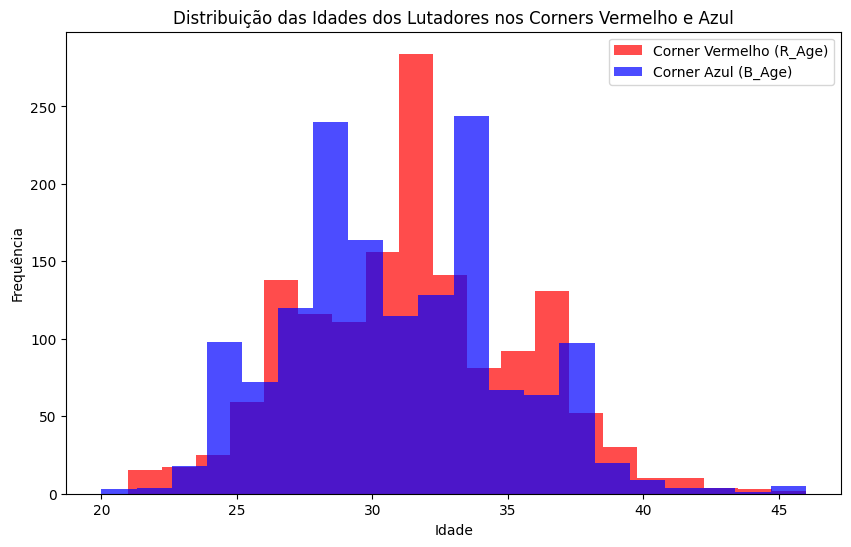

In [24]:
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Cria os histogramas
plt.hist(ufc['R_Age'], bins=20, alpha=0.7, label='Corner Vermelho (R_Age)', color='red')
plt.hist(ufc['B_Age'], bins=20, alpha=0.7, label='Corner Azul (B_Age)', color='blue')

# Adiciona o título e os rótulos dos eixos
plt.title('Distribuição das Idades dos Lutadores nos Corners Vermelho e Azul')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Adiciona a legenda
plt.legend()

# Exibe o gráfico
plt.show()

Algumas informações que foram possíveis observar são: Os lutadores que possuem 32 anos possuem uma tendência maior a lutar no corner vermelho. Acima dos 35 anos, quase sempre os lutadores tendem a ficar no corner vermelho.

### Relação entre Altura e Peso
Construa um gráfico de dispersão para visualizar a relação entre altura e peso dos lutadores nos corners vermelho e azul.

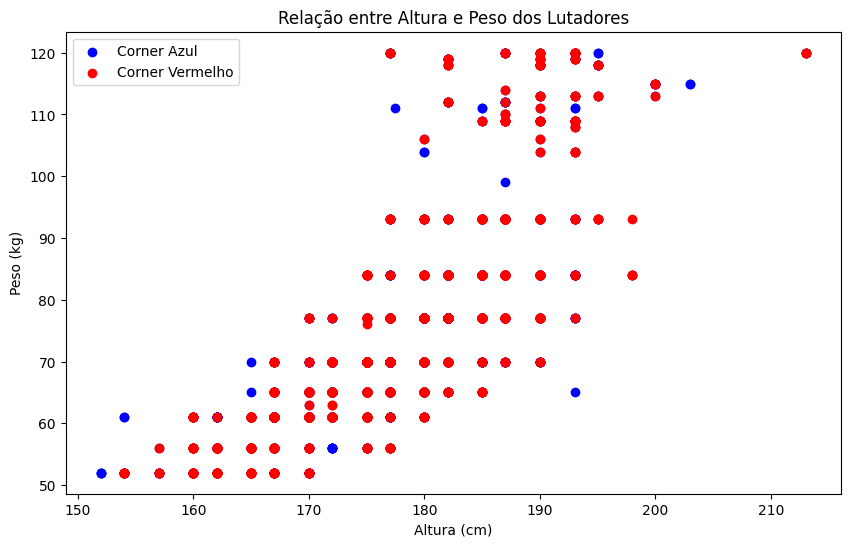

In [25]:
import matplotlib.pyplot as plt

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico de dispersão para o corner azul
plt.scatter(ufc['B_Height'], ufc['B_Weight'], color='blue', label='Corner Azul')

# Gráfico de dispersão para o corner vermelho
plt.scatter(ufc['R_Height'], ufc['R_Weight'], color='red', label='Corner Vermelho')

# Adiciona o título e os rótulos dos eixos
plt.title('Relação entre Altura e Peso dos Lutadores')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')

# Adiciona a legenda
plt.legend()

# Exibe o gráfico
plt.show()

Esse gráfico não permite nenhuma conclusão significativa, pois como se tratam de lutas onde os lutadores podem se repetir, muitas vezes os pontos estão sobrepostos.

### Métodos de Vitória
Crie um gráfico de barras para mostrar os métodos mais comuns de vitória, tais como: decisão (DEC), nocaute (KO/TKO) e submissão (SUB). Comente sobre os métodos de vitória mais frequentes e o que isso pode indicar sobre o estilo dos lutadores.

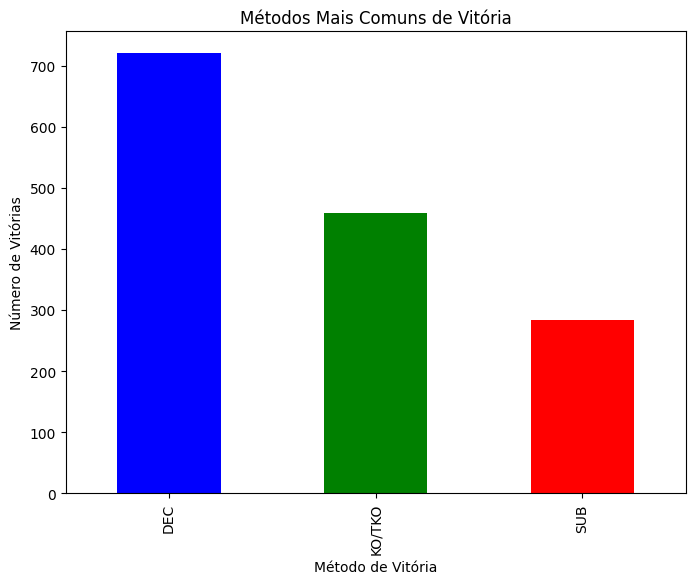

In [26]:
# Conta a frequência de cada método de vitória
winby_counts = ufc['winby'].value_counts()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
winby_counts.plot(kind='bar', color=['blue', 'green', 'red'])

# Adiciona título e rótulos
plt.title('Métodos Mais Comuns de Vitória')
plt.xlabel('Método de Vitória')
plt.ylabel('Número de Vitórias')

# Exibe o gráfico
plt.show()


Pôde se observar um número elevado de vitórias por decisão, isso indica que os lutadores tendem a levar as lutas até o final, possivelmente por possuírem estilos mais técnicos ou equilibrados, evitando riscos.


### Vitórias por Corner
Crie um gráfico de pizza para mostrar a quantidade de vitórias de lutadores no corner vermelho e no corner azul.

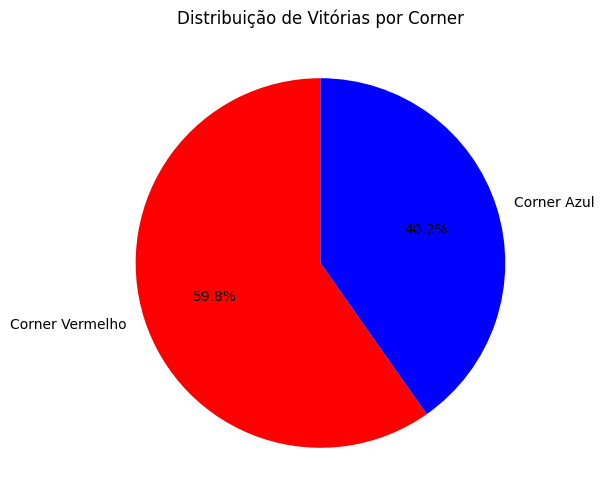

In [27]:
# Filtra apenas as vitórias dos corners vermelho e azul para excluir a "no contest"
filtered_wins = ufc[ufc['winner'].isin(['red', 'blue'])]

# Conta o número de vitórias por corner
victories = filtered_wins['winner'].value_counts()

# Define novos rótulos para a legenda
labels = ['Corner Vermelho', 'Corner Azul']

# Cria o gráfico de pizza com os novos rótulos
plt.figure(figsize=(6, 6))
plt.pie(victories, labels=labels, autopct='%1.1f%%', colors=['red', 'blue'], startangle=90)

# Adiciona o título
plt.title('Distribuição de Vitórias por Corner')

# Exibe o gráfico
plt.show()

## Parte 2: Criando um Ranking dos Lutadores
Agora, você deve criar um ranking dos lutadores utilizando a fórmula a seguir, ajustada para usar valores normalizados (entre 0 e 1), garantindo que todas as variáveis contribuam proporcionalmente ao cálculo do ranking:

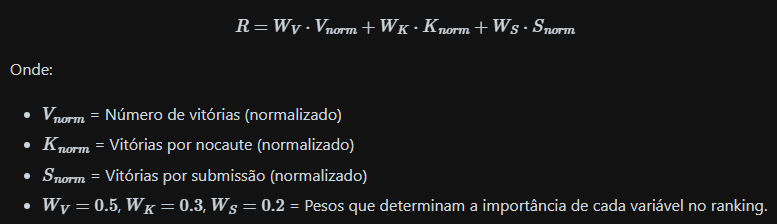

### Separando as informações necessárias
Note que no nosso dataset não possui a quantidade de vitórias de cada lutador, então é necessário fazer com que um código que percorra todas as linhas do dataframe e conte as vitórias dos lutadores.

In [28]:
# Primeiro vamos separar apenas os nomes dos vencedores e o tipo de nocaute

# Lista para armazenar os resultados
data = []

# Itera sobre as linhas do DataFrame
for index, row in ufc.iterrows():
    if row['winner'] == 'red':
        data.append({'Name': row['R_Name'], 'winby': row['winby']})
    elif row['winner'] == 'blue':
        data.append({'Name': row['B_Name'], 'winby': row['winby']})

# Cria um novo DataFrame com os dados coletados
ufc_reduced = pd.DataFrame(data)

# Exibe o novo DataFrame
print(ufc_reduced)

                       Name   winby
0     Antonio Carlos Junior     DEC
1     Carlos Diego Ferreira     SUB
2                Joe Lauzon  KO/TKO
3            Brandon Moreno     SUB
4         Raquel Pennington     DEC
...                     ...     ...
1446        Alejandro Perez     DEC
1447         Ali Bagautinov     DEC
1448        Patrick Cummins     DEC
1449      Joanne Calderwood  KO/TKO
1450           Jacare Souza     SUB

[1451 rows x 2 columns]


### Separando uma cópia em ordem alfabética

In [29]:
# Para conferir o resultado, iremos ordenar o dataset em ordem alfabética

# Ordena o DataFrame resultante pela coluna 'Name' em ordem alfabética
ufc_reduced_sorted = ufc_reduced.sort_values(by='Name', ascending=True)

# Exibe o DataFrame ordenado
ufc_reduced_sorted.head(10)

,Name,winby
1119,Abdul Razak Alhassan,KO/TKO
965,Abel Trujillo,SUB
213,Abel Trujillo,DEC
1026,Abel Trujillo,SUB
995,Abel Trujillo,KO/TKO
1259,Adam Milstead,KO/TKO
791,Adriano Martins,DEC
769,Adriano Martins,KO/TKO
459,Adriano Martins,KO/TKO
1303,Aiemann Zahabi,DEC


### Contando as vitórias e separando em colunas diferentes
Nessa etapa, serão contadas as vitórias, as vitórias por nocaute e as vitórias por submissão.

In [30]:
# Conta o número total de vitórias por lutador
wins_df = ufc_reduced.groupby('Name').size().reset_index(name='Wins')

# Conta o número de vitórias por KO/TKO (nocaute)
wins_by_ko_df = ufc_reduced[ufc_reduced['winby'] == 'KO/TKO'].groupby('Name').size().reset_index(name='Wins_By_KO')

# Conta o número de vitórias por SUB (submissão)
wins_by_sub_df = ufc_reduced[ufc_reduced['winby'] == 'SUB'].groupby('Name').size().reset_index(name='Wins_By_Sub')

# Mescla os resultados no DataFrame final
ufc_part2 = wins_df.merge(wins_by_ko_df, on='Name', how='left').merge(wins_by_sub_df, on='Name', how='left')

# Preenche valores NaN com 0 (para lutadores sem vitórias por KO ou SUB)
ufc_part2['Wins_By_KO'] = ufc_part2['Wins_By_KO'].fillna(0)
ufc_part2['Wins_By_Sub'] = ufc_part2['Wins_By_Sub'].fillna(0)

# Exibe o DataFrame final
print(ufc_part2)

                     Name  Wins  Wins_By_KO  Wins_By_Sub
0    Abdul Razak Alhassan     1         1.0          0.0
1           Abel Trujillo     4         1.0          2.0
2           Adam Milstead     1         1.0          0.0
3         Adriano Martins     3         2.0          0.0
4          Aiemann Zahabi     1         0.0          0.0
..                    ...   ...         ...          ...
599           Yuta Sasaki     1         0.0          1.0
600          Yves Jabouin     1         0.0          0.0
601          Zak Cummings     5         1.0          2.0
602             Zak Ottow     1         0.0          0.0
603      Zubaira Tukhugov     3         1.0          0.0

[604 rows x 4 columns]


### Normalizando as colunas
Agora, iremos normalizar as colunas Wins, Wins_By_KO e Wins_By_Sub para deixá-las com valores entre 0 e 1. Porém antes de normalizar, iremos adicionar uma linha nula, para que cada coluna contribua para o score que vamos calcular depois.

In [31]:
# Cria uma nova linha com Name como "Nulo" e as outras colunas com 0
new_row = pd.DataFrame({'Name': ['Nulo'], 'Wins': [0], 'Wins_By_KO': [0], 'Wins_By_Sub': [0]})

# Adiciona a nova linha ao DataFrame
ufc_part2 = pd.concat([ufc_part2, new_row], ignore_index=True)

# Exibe o DataFrame atualizado
print(ufc_part2)

                     Name  Wins  Wins_By_KO  Wins_By_Sub
0    Abdul Razak Alhassan     1         1.0          0.0
1           Abel Trujillo     4         1.0          2.0
2           Adam Milstead     1         1.0          0.0
3         Adriano Martins     3         2.0          0.0
4          Aiemann Zahabi     1         0.0          0.0
..                    ...   ...         ...          ...
600          Yves Jabouin     1         0.0          0.0
601          Zak Cummings     5         1.0          2.0
602             Zak Ottow     1         0.0          0.0
603      Zubaira Tukhugov     3         1.0          0.0
604                  Nulo     0         0.0          0.0

[605 rows x 4 columns]


In [32]:
# Colunas para normalizar
columns_to_normalize = ['Wins', 'Wins_By_KO', 'Wins_By_Sub']

# Cria uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Aplica a normalização nas colunas selecionadas
ufc_part2[columns_to_normalize] = scaler.fit_transform(ufc_part2[columns_to_normalize])

# Exibe o DataFrame normalizado
print(ufc_part2)

                     Name      Wins  Wins_By_KO  Wins_By_Sub
0    Abdul Razak Alhassan  0.090909    0.142857          0.0
1           Abel Trujillo  0.363636    0.142857          0.5
2           Adam Milstead  0.090909    0.142857          0.0
3         Adriano Martins  0.272727    0.285714          0.0
4          Aiemann Zahabi  0.090909    0.000000          0.0
..                    ...       ...         ...          ...
600          Yves Jabouin  0.090909    0.000000          0.0
601          Zak Cummings  0.454545    0.142857          0.5
602             Zak Ottow  0.090909    0.000000          0.0
603      Zubaira Tukhugov  0.272727    0.142857          0.0
604                  Nulo  0.000000    0.000000          0.0

[605 rows x 4 columns]


### Calculando o score com base na fórmula fornecida no exercício.


In [33]:
# Calcula a coluna 'Score' com base na fórmula fornecida
ufc_part2['Score'] = (0.5 * ufc_part2['Wins']) + (0.3 * ufc_part2['Wins_By_KO']) + (0.2 * ufc_part2['Wins_By_Sub'])

# Exibe o DataFrame com a nova coluna 'Score'
print(ufc_part2)

                     Name      Wins  Wins_By_KO  Wins_By_Sub     Score
0    Abdul Razak Alhassan  0.090909    0.142857          0.0  0.088312
1           Abel Trujillo  0.363636    0.142857          0.5  0.324675
2           Adam Milstead  0.090909    0.142857          0.0  0.088312
3         Adriano Martins  0.272727    0.285714          0.0  0.222078
4          Aiemann Zahabi  0.090909    0.000000          0.0  0.045455
..                    ...       ...         ...          ...       ...
600          Yves Jabouin  0.090909    0.000000          0.0  0.045455
601          Zak Cummings  0.454545    0.142857          0.5  0.370130
602             Zak Ottow  0.090909    0.000000          0.0  0.045455
603      Zubaira Tukhugov  0.272727    0.142857          0.0  0.179221
604                  Nulo  0.000000    0.000000          0.0  0.000000

[605 rows x 5 columns]


### Listando os 10 melhores lutadores com base no score

In [34]:
# Ordena o DataFrame pela coluna 'Score' em ordem decresente
ufc_part2_sorted = ufc_part2.sort_values(by='Score', ascending=False)

# Exibe o DataFrame ordenado
ufc_part2_sorted.head(10)

,Name,Wins,Wins_By_KO,Wins_By_Sub,Score
157,Donald Cerrone,1.000000,0.857143,0.50,0.857143
393,Max Holloway,0.909091,0.714286,0.50,0.768831
148,Derrick Lewis,0.727273,1.000000,0.00,0.663636
421,Neil Magny,0.909091,0.428571,0.25,0.633117
206,Gegard Mousasi,0.727273,0.714286,0.25,0.627922
563,Tony Ferguson,0.727273,0.142857,1.00,0.606494
115,Conor McGregor,0.636364,0.857143,0.00,0.575325
62,Beneil Dariush,0.727273,0.142857,0.75,0.556494
92,Chas Skelly,0.545455,0.142857,1.00,0.515584
143,Demetrious Johnson,0.636364,0.142857,0.75,0.511039
